In [38]:
import qiskit
from qiskit import QuantumCircuit,execute,Aer,transpile,BasicAer
from qiskit.circuit.library import SwapGate,QFT,CZGate,SGate,TGate,GroverOperator
from qiskit.algorithms import Grover
#from qiskit.algorithms import Grover
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import matplotlib as plt
import math

In [65]:
def inicializador(circuit):
    circuit.x(0)
    circuit.x(3)
    circuit.h(4)
    circuit.h(5)
    circuit.h(7)
    circuit.h(8)
    return circuit

def contadorqubits():
    
    completo=QuantumCircuit(12,12)
    qft=QFT(3)    
    invqft=QFT(3,0,True,True)
    ctgate = TGate().control(1)

    completo.barrier()

    #inicializador de qft
    completo_2=completo.compose(qft,qubits=[9,10,11])    
    
    completo_2.append(ctgate, [4, 9])
    completo_2.cs(4,10)
    completo_2.cz(4,11)
    
    completo_2.barrier()
    completo_2.append(ctgate, [5, 9])
    completo_2.cs(5,10)
    completo_2.cz(5,11)

    completo_2.barrier()
    completo_2.append(ctgate, [7, 9])
    completo_2.cs(7,10)
    completo_2.cz(7,11)

    completo_2.barrier()
    completo_2.append(ctgate, [8, 9])
    completo_2.cs(8,10)
    completo_2.cz(8,11)
    #inversion de qft
    completo_3=completo_2.compose(invqft,qubits=[9,10,11])
    completo_3.barrier()
    return completo_3

#coloca las todos los estados que tengo suma de 2
def prob2():
    completo_1=QuantumCircuit(14,14)

    completo_1.x(11)
    completo_1.x(9)
    completo_1.ccx(9,10,12)
    completo_1.ccx(11,12,13)
    completo_1.z(13) # recordatorio z
    completo_1.ccx(9,10,12)
    completo_1.ccx(11,12,13)
    completo_1.x(9)
    completo_1.x(11)
    
    return completo_1

# crea a grover 
def instalargrover(aux):
    completo_1=QuantumCircuit(14,14)
    #revertir compuerta
    completo_1.barrier()   

    completo_1.h(range(4,6))
    completo_1.h(range(7,9))
    completo_1.x(range(4,6))
    completo_1.x(range(7,9))   
    # completo_1.h(aux)
    # completo_1.x(aux)
    completo_1.barrier()
    # completo_1.ccx(4,5,15)
    # completo_1.ccx(7,8,14)
    # completo_1.ccx(15,14,aux)

    completo_1.ccx(4,5,12)
    completo_1.ccx(7,12,aux)
    
    completo_1.barrier()
    completo_1.x(aux)
    completo_1.z(aux)
    completo_1.x(aux)
    completo_1.barrier()
    
    completo_1.ccx(7,12,8)
    completo_1.ccx(4,5,12)
    # completo_1.ccx(15,14,aux)
    # completo_1.ccx(4,5,15)
    # completo_1.ccx(7,8,14)
    completo_1.barrier()
    completo_1.x(range(4,6))
    completo_1.x(range(7,9))
    completo_1.h(range(4,6))
    completo_1.h(range(7,9))
    # completo_1.x(aux)
    # completo_1.h(aux)

    return completo_1

#la condicion que acepta solo a las dos casos 1100 y 1001 ambos casos tiene 1 en a y 0 en c
def ganador():
    completo_1=QuantumCircuit(14,14)
    completo_1.barrier()
    completo_1.x(7)
    # completo_1.h(13)
    # completo_1.z(13)
    # completo_1.x(13)
    completo_1.ccx(4,7,12)
    
    completo_1.z(12)
    
    return completo_1

#crea las medicione qubtis con cbit
def medicion(circuit,inicio,fin,total_qubits=-1):
    if total_qubits!=-1:
        for i in range(total_qubits):
            circuit.measure(i,i)
    else:
        for i in range(inicio,fin+1):
            circuit.measure(i,i)
    return circuit


In [66]:
bits=qubits=14

circuit=QuantumCircuit(qubits,bits)         #Crear un circuito con 9 qubits para el primer parametro y 9 bits para el segundo parametro

circuit=inicializador(circuit)

# circuit.draw(output='mpl')

In [63]:
circuit_1=contadorqubits()
completo1=circuit.compose(circuit_1)
# circuit_1.draw(output='mpl')

In [59]:
# identifica los 2
circuit_2=prob2()
completo2=completo1.compose(circuit_2)
# circuit_2.draw(output='mpl')

In [53]:
circuit_3=instalargrover(8)    #crea grover de  4
completo3=completo2.compose(circuit_3)

# circuit_3.draw(output='mpl')

In [44]:
circuit_4=ganador()    #busca solo las dos ultimas opciones 1100 y 1001
completo4=completo3.compose(circuit_4)

# circuit_4.draw(output='mpl')

In [45]:
circuit_5=instalargrover(8) #aplifica las dos opciones de arriba
completo5=completo4.compose(circuit_5)
# circuit_5.draw(output='mpl')

In [60]:
circuit6=medicion(completo3,4,5)
circuit6=medicion(completo3,7,8)
# # circuit6.measure(13,13)
# circuit6.measure(16,16)
# circuit6.draw(output='mpl')

In [67]:
backend = Aer.get_backend('statevector_simulator')
job = execute(circuit6, backend=backend)
job_result = job.result()
vector = job_result.get_statevector(circuit6)
Statevector(vector).probabilities_dict()
# for i in vector:
#     print(i)
# print(job_result.get_statevector(circuit6))


{'00000110111001': 0.035714285714285594,
 '00001110111001': 0.32142857142857145,
 '00011110111001': 0.32142857142857145,
 '00100110111001': 3.3148190922642085e-33,
 '00101110111001': 6.936225887984991e-33,
 '00110110111001': 2.8010988534636696e-32,
 '00111110111001': 4.278116777314028e-33,
 '10010110111001': 0.32142857142857145}

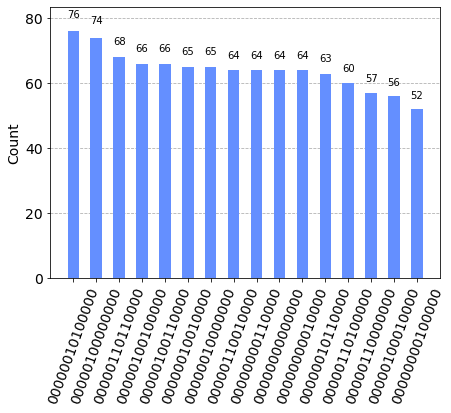

In [48]:
simulacion=Aer.get_backend('qasm_simulator') #crear una instancia de simulacion
job=execute(circuit6,simulacion,shot=1000)
result=job.result()
counts=result.get_counts(circuit6)
plot_histogram(counts,sort='value_desc')